In [2]:
#Titanic Kaggle

In [3]:
import pandas as pd
data = pd.read_csv("U4_04_train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='Survived', ylabel='count'>

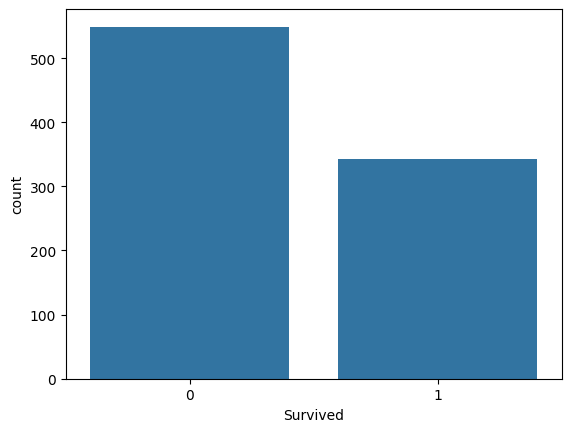

In [6]:
import seaborn as sb
sb.countplot(x="Survived", data=data)

<Axes: xlabel='Survived', ylabel='count'>

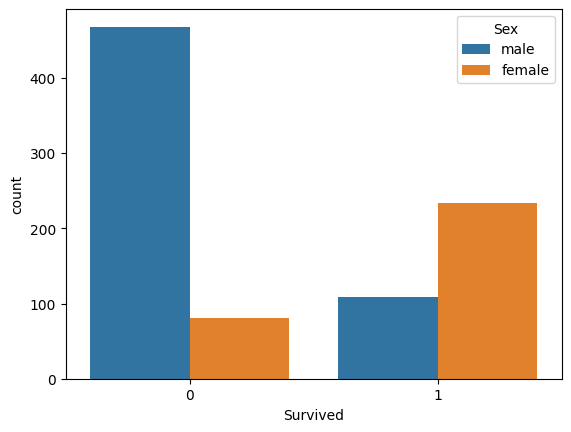

In [7]:
sb.countplot(x="Survived", data=data, hue="Sex")

In [8]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

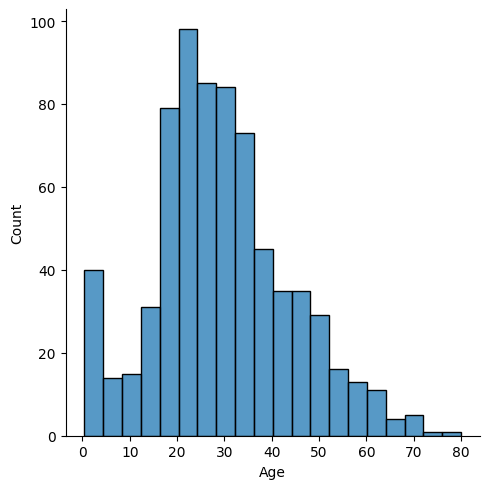

In [9]:
sb.displot(x="Age", data=data)

In [10]:
data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [11]:
data["Age"].mean()

np.float64(29.69911764705882)

In [12]:
data["Age"].fillna(data["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [13]:
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [14]:
data["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [15]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
data = data.drop(["Cabin"], axis=1)

In [17]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [18]:
data = data.dropna()

In [19]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
data = data.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [21]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:
dummies_sex = pd.get_dummies(data["Sex"], drop_first=True, dtype=int)
# Multicolinearity

In [23]:
data = data.join(dummies_sex)
data = data.drop(["Sex"], axis=1)

<Axes: xlabel='Survived', ylabel='count'>

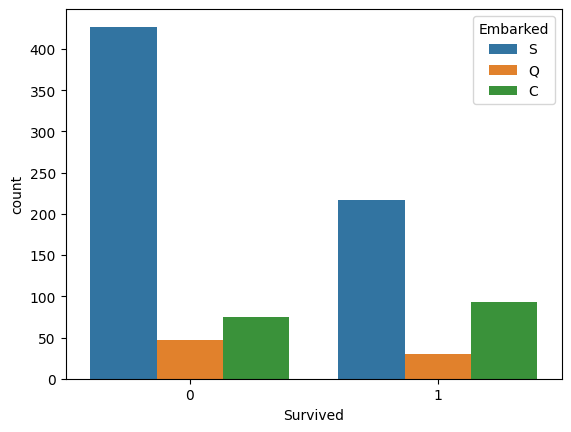

In [24]:
sb.countplot(x="Survived", data=data, hue="Embarked")

In [25]:
dummies_embarked = pd.get_dummies(data["Embarked"], drop_first=True, dtype=int)

In [26]:
data = data.join(dummies_embarked)
data = data.drop(["Embarked"], axis=1)

<Axes: >

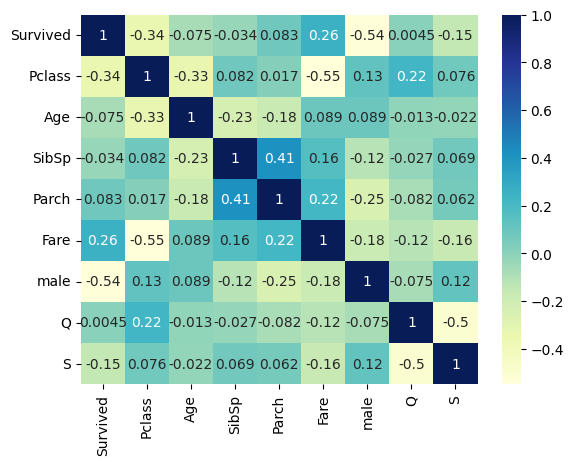

In [27]:
sb.heatmap(data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

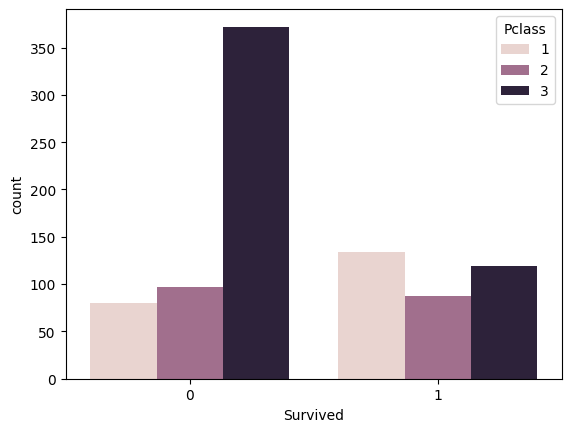

In [28]:
sb.countplot(x="Survived", data=data, hue="Pclass")

In [29]:
X = data.drop(["Survived"], axis=1)
y = data["Survived"]

In [30]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [31]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=50)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pru, predicciones)

0.8089887640449438

In [33]:
from sklearn.tree import DecisionTreeClassifier

resultados = []
for i in range(1, 15):
    modelo = DecisionTreeClassifier(max_depth=i)
    modelo.fit(X_ent, y_ent)
    predicciones = modelo.predict(X_pru)
    exactitud = accuracy_score(y_pru, predicciones)
    print(f"Resultado para {i}: {exactitud}")
    resultados.append(exactitud)

Resultado para 1: 0.7528089887640449
Resultado para 2: 0.7528089887640449
Resultado para 3: 0.7808988764044944
Resultado para 4: 0.797752808988764
Resultado para 5: 0.7921348314606742
Resultado para 6: 0.8146067415730337
Resultado para 7: 0.797752808988764
Resultado para 8: 0.8089887640449438
Resultado para 9: 0.8202247191011236
Resultado para 10: 0.8202247191011236
Resultado para 11: 0.797752808988764
Resultado para 12: 0.8258426966292135
Resultado para 13: 0.8202247191011236
Resultado para 14: 0.8146067415730337


<Axes: >

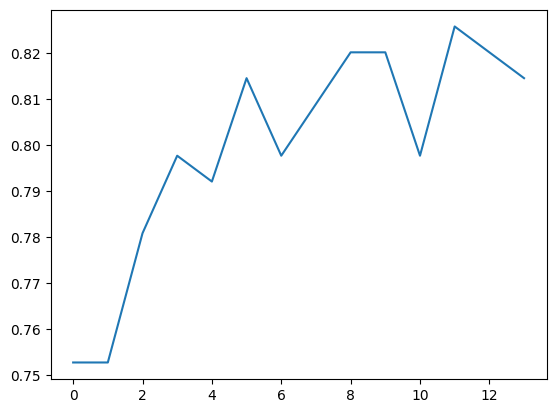

In [34]:
sb.lineplot(data = resultados)

In [35]:
modelo = DecisionTreeClassifier(max_depth=4)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
exactitud = accuracy_score(y_pru, predicciones)

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       113
           1       0.80      0.60      0.68        65

    accuracy                           0.80       178
   macro avg       0.80      0.76      0.77       178
weighted avg       0.80      0.80      0.79       178



In [37]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_pru, predicciones), columns = ["Pred: No", "Pred: Si"], index = ["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,103,10
Real: Si,26,39


In [38]:
X_ent.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

[Text(0.5089285714285714, 0.9, 'male <= 0.5\n0.474\n711\n[436, 275]\nMurió'),
 Text(0.2857142857142857, 0.7, 'Pclass <= 2.5\n0.37\n253\n[62, 191]\nVivió'),
 Text(0.39732142857142855, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'Age <= 2.5\n0.071\n135\n[5, 130]\nVivió'),
 Text(0.07142857142857142, 0.3, 'Parch <= 1.5\n0.5\n2\n[1, 1]\nMurió'),
 Text(0.03571428571428571, 0.1, '0.0\n1\n[0, 1]\nVivió'),
 Text(0.10714285714285714, 0.1, '0.0\n1\n[1, 0]\nMurió'),
 Text(0.21428571428571427, 0.3, 'Fare <= 26.125\n0.058\n133\n[4, 129]\nVivió'),
 Text(0.17857142857142858, 0.1, '0.156\n47\n[4, 43]\nVivió'),
 Text(0.25, 0.1, '0.0\n86\n[0, 86]\nVivió'),
 Text(0.42857142857142855, 0.5, 'Fare <= 22.904\n0.499\n118\n[57.0, 61.0]\nVivió'),
 Text(0.35714285714285715, 0.3, 'S <= 0.5\n0.478\n96\n[38, 58]\nVivió'),
 Text(0.32142857142857145, 0.1, '0.387\n42\n[11, 31]\nVivió'),
 Text(0.39285714285714285, 0.1, '0.5\n54\n[27, 27]\nMurió'),
 Text(0.5, 0.3, 'Parch <= 0.5\n0.236\n22\n[19, 3]\nMurió'),
 Text(0.4

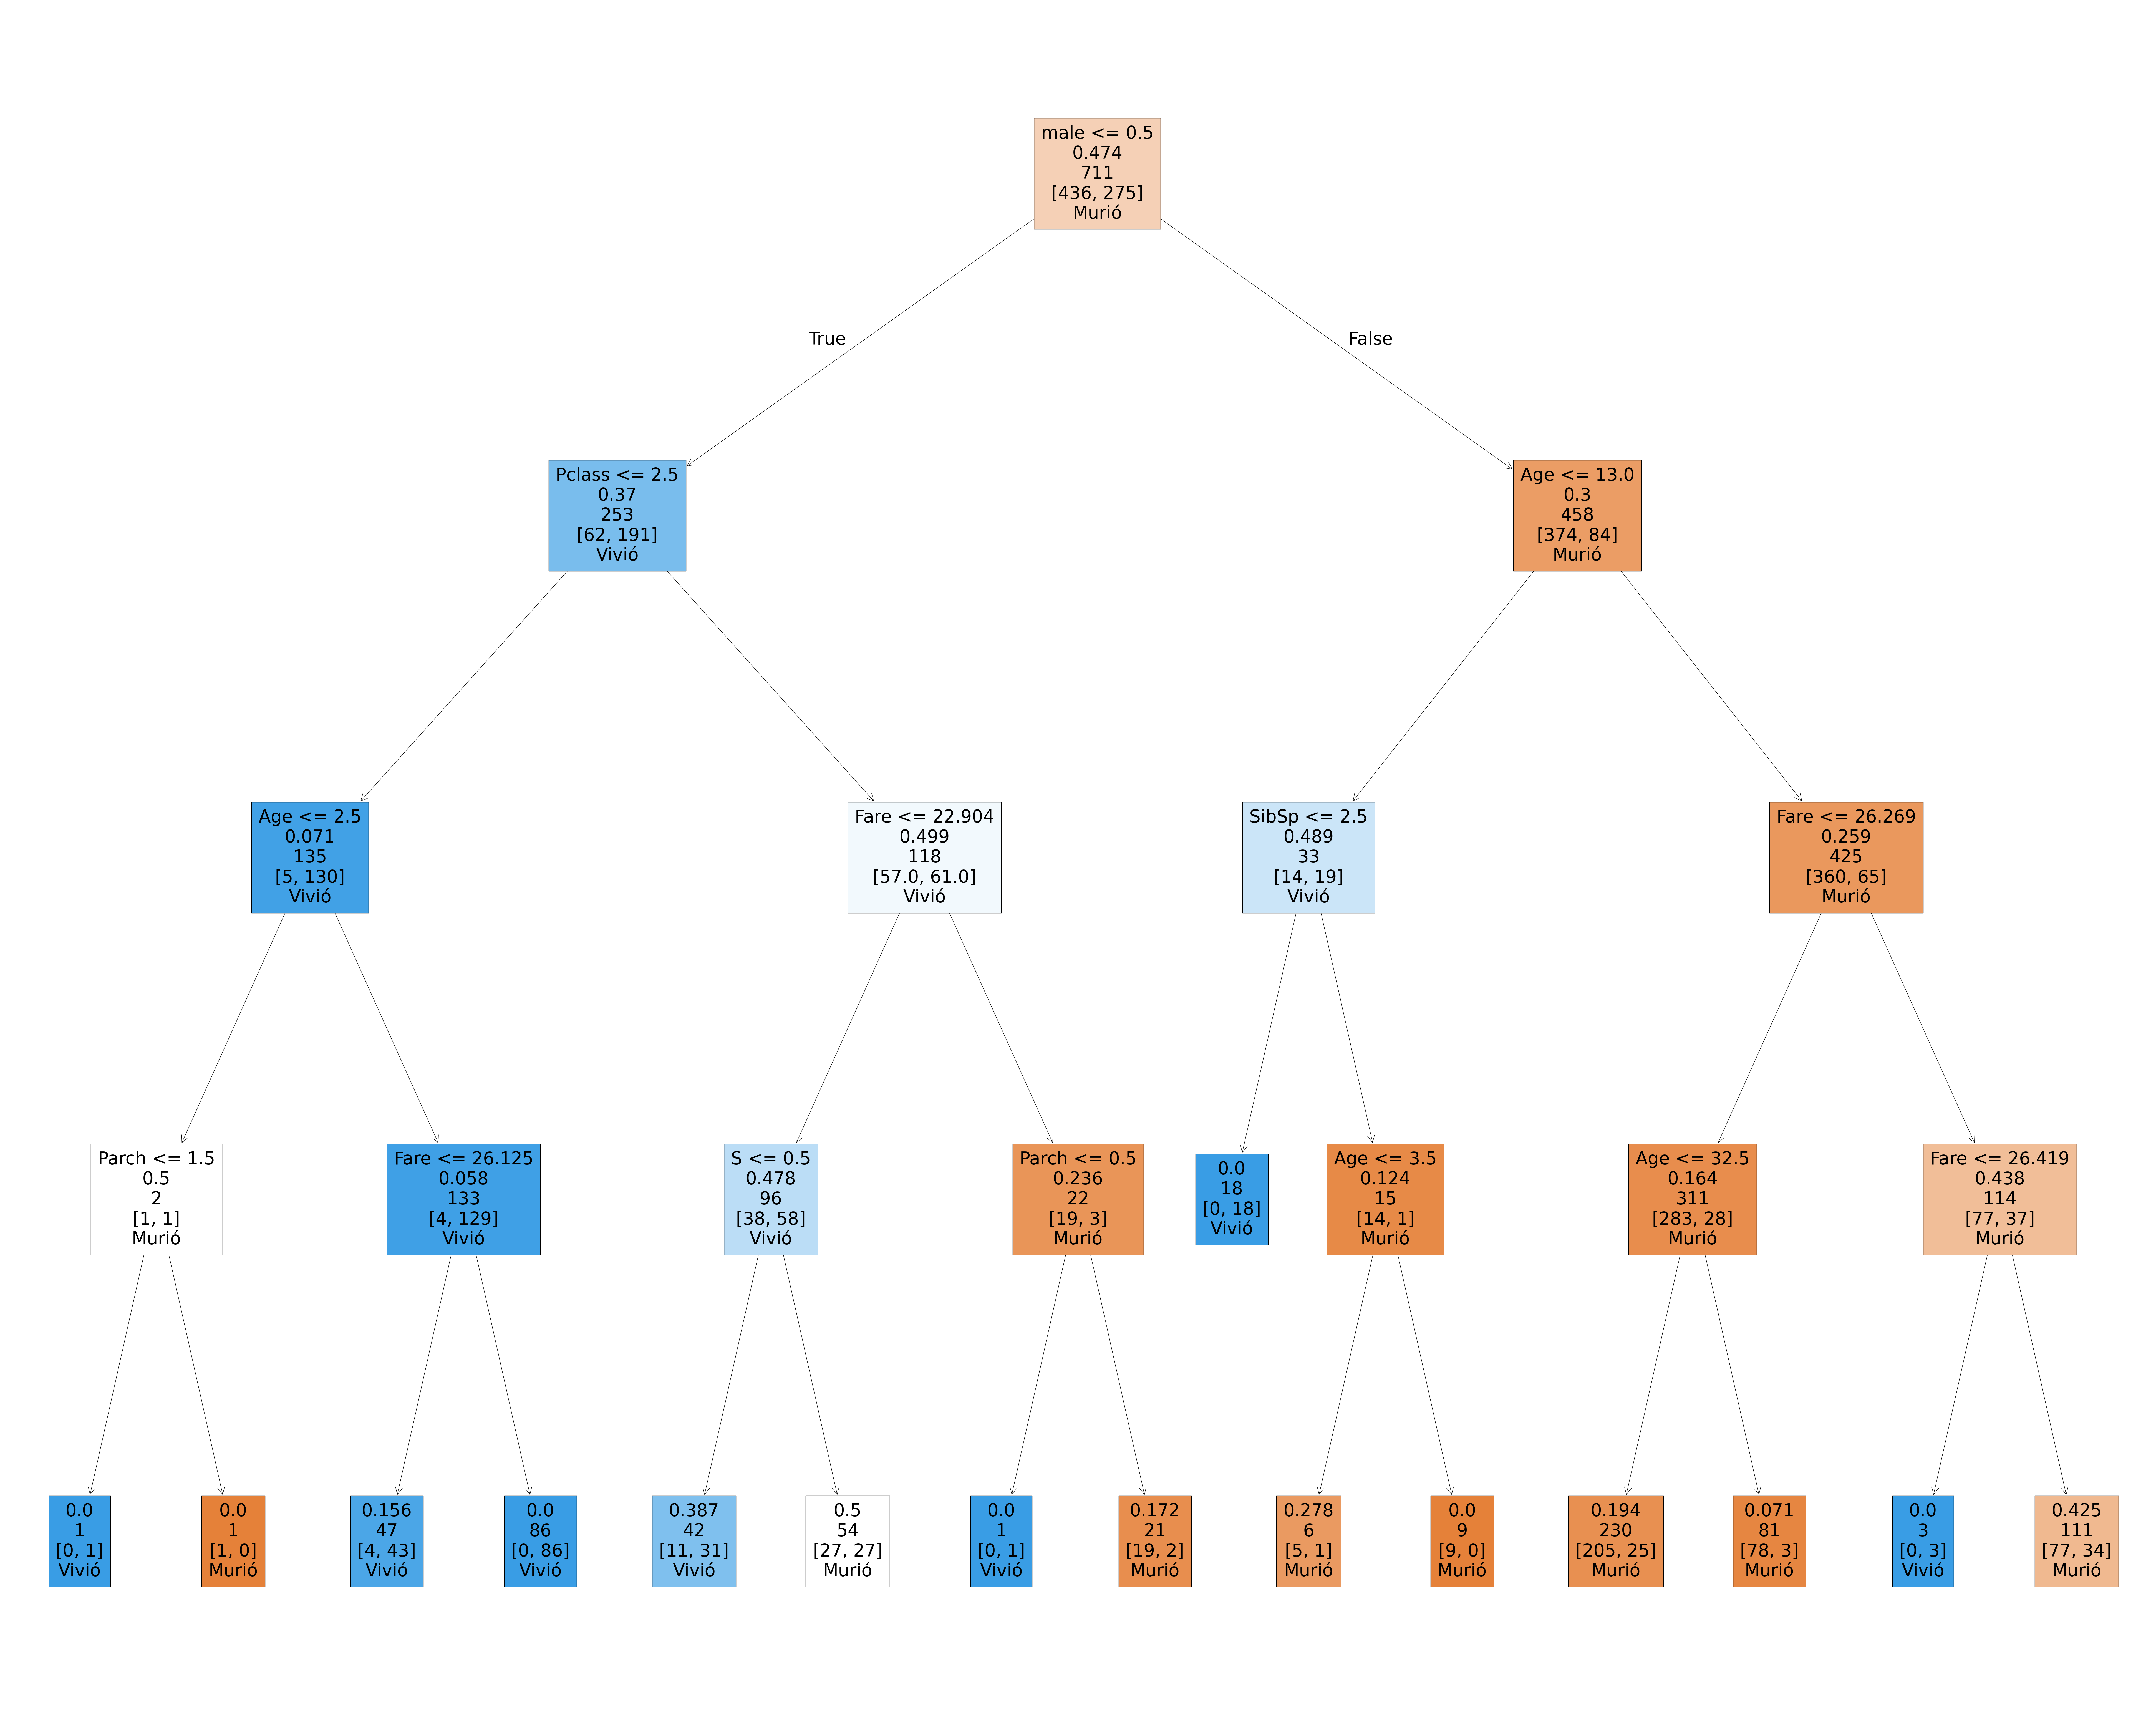

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (100,80))
plot_tree(
    modelo,
    feature_names = X_ent.columns,
    class_names = ["Murió", "Vivió"],
    filled = True, label="none"
)


In [38]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pru, predicciones)

0.7865168539325843

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       102
           1       0.81      0.66      0.72        76

    accuracy                           0.79       178
   macro avg       0.79      0.77      0.78       178
weighted avg       0.79      0.79      0.78       178



In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pru, predicciones)

array([[90, 12],
       [26, 50]])

In [41]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns = ["Pred: No", "Pred: Si"], index = ["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,90,12
Real: Si,26,50


In [42]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [46]:
nueva_persona = [1, 35, 0, 0, 90, 1, 0, 0]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
    print("Sobreviviste")
else:
    print("No sobreviviste")

Sobreviviste


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
